<div style="text-align: center; font-size: 36px; font-weight: bold; color: #2E86C1;">Introduction to Data Science - Final Assignment</div>
<div style="text-align: center; font-size: 25px; font-weight: bold; color: #2E86C1;">PART B - Unsupervised Learning</div>
<div style="text-align: center; font-size: 20px; color: #555;">Group 005 | Eran Tascesme - 205708720 | David Perelman 206467870</div>

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">1️⃣ <b>DBScan Algorithm</b></div>
<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 15px;">

<b>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</b> is a clustering algorithm that groups points based on density, identifying core, border, and noise points. It does not require specifying the number of clusters and can detect arbitrarily shaped clusters while handling outliers effectively. However, its performance depends on two key parameters: eps (radius for neighborhood search) and min_samples (minimum points required to form a dense region).

<p style="font-size: 18px;">✨<b>Advantages and Disadvantages of DBSCAN</b></p>

✅<b><u>Advantages</u></b></br>

🔹<b>Identifies Arbitrary-Shaped Clusters:</b> Unlike k-means, DBSCAN can detect clusters of different shapes and sizes.</br>
🔹<b>No Need to Predefine the Number of Clusters:</b> Unlike k-means, DBSCAN does not require specifying the number of clusters in advance.</br>
🔹<b>Robust to Noise and Outliers:</b> DBSCAN marks outliers as noise instead of forcing them into clusters.</br>
🔹<b>Works Well with Density-Based Structures:</b> Effective when clusters have varying densities.</br>

❌<b><u>Disadvantages</u></b></br>
🔸<b>Difficulty with Varying Densities:</b> If clusters have different densities, a single set of parameters might not work well.</br>
🔸<b>Sensitive to Hyperparameters:</b> The choice of eps and min_samples greatly affects performance.</br>
🔸<b>Scalability Issues:</b> The algorithm has a time complexity of 
𝑂
(
𝑛
log
⁡
𝑛
)
O(nlogn) but can become inefficient for very large datasets.</br></br>

<p style="font-size: 18px;">✨<b>Significance of Hyperparameters</b></p>
🔹<b>eps (Epsilon radius):</b> Defines the maximum distance between two points for them to be considered neighbors. A small eps may result in too many noise points, while a large eps may merge different clusters.</br>
🔹<b>min_samples (Minimum points to form a cluster):</b> Determines how dense a region must be to be considered a cluster. Lower values can lead to small, insignificant clusters, while higher values may fail to identify meaningful clusters.</br>
</br>
<p style="font-size: 18px;">✨<b>When to Use DBSCAN</b></p>
🔹When clusters have irregular or non-convex shapes.</br>
🔹When you expect noise and outliers in the data.</br>
🔹When the number of clusters is unknown and varies dynamically.</br>
</br>
<p style="font-size: 18px;">✨<b>When to Use Other Models</b></p>
🔹If clusters have significantly different densities (consider HDBSCAN instead).</br>
🔹If you need a highly scalable clustering method for very large datasets (k-means or hierarchical clustering may be better).</br>
🔹If clusters are well-separated and spherical, k-means might be a better choice.
</div>

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">2️⃣ <b>Selecting optimal parameters</b></div>

<div style="font-family: Times; font-size: 18px; background-color: #EAF2F8; padding: 15px;">
We applied three distance metrics—<b>Euclidean, Manhattan, and Chebyshev</b>—to evaluate the DBSCAN clustering performance. Since the data is high-dimensional, approximation becomes challenging, making the choice of distance metric crucial. To address this, I normalized the data using StandardScaler to ensure fair comparisons across metrics.

For parameter selection, I explored a reasonable range of values for <b>epsilon and min_samples</b> to balance cluster formation and noise filtering. The optimal hyperparameters were chosen based on the combination that achieved the best <b>Silhouette score</b>, ensuring well-separated and meaningful clusters.
</div>

<div style="color: #D35400; font-size: 15px;"> 🔽 Import Libraries</div>

In [765]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import product
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

<div style="color: #D35400; font-size: 15px;"> 📂 Load Dataset function</div>

In [767]:
# Load datasets
def load_data(filename):
    return pd.read_csv(filename)

<div style="color: #D35400; font-size: 15px;"> 🎛 Optimize DBSCAN parameters function</div>

In [769]:
# Optimize DBSCAN parameters
def optimize_dbscan(data, eps_values, min_samples_values, metrics_list):
    best_score = -1
    best_params = None
    best_labels = None
    best_metric = None

    results = {
        "euclidean": [], "manhattan": [], "chebyshev": []
    }
    
    for metric, eps, min_samples in product(metrics_list, eps_values, min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        labels = dbscan.fit_predict(data)
        
        # Ignore cases where all points are noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(data, labels, metric=metric)
            
            results[metric].append({
                    'eps_values': round(eps, 3),
                    'min_pts': min_samples,
                    'score': score,
                    'n_clusters': n_clusters,
                    'noise_points': sum(labels == -1)
                })
            
            if score is not None:
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples, metric, n_clusters, sum(labels == -1))
                    best_labels = labels

    return best_params, best_score, best_labels, results

<div style="color: #D35400; font-size: 15px;"> 🚀 Evaluate additional metrics function</div>

In [771]:
# Evaluate additional metrics
def evaluate_metrics(data, labels, best_metric):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels, metric=best_metric)
        db_index = davies_bouldin_score(data, labels)
        calinski = calinski_harabasz_score(data, labels)
        return silhouette, db_index, calinski
    return None, None, None

<div style="color: #D35400; font-size: 15px;"> 🔄 Process both datasets</div>

In [773]:
# Process both datasets
def process_dataset(filename):
    data = load_data(filename)
    data_scaled = StandardScaler().fit_transform(data)  # Standardize features
    
    # Define parameter search space
    metrics_list = ["euclidean", "manhattan", "chebyshev"]
    eps_values = np.linspace(0.1, 2.0, 20)
    min_samples_values = range(3, 10)

    best_params, best_score, best_labels, results = optimize_dbscan(data_scaled, eps_values, min_samples_values, metrics_list)
        
    print(f"Dataset: {filename}")
    print(f"Best Parameters: eps={best_params[0]}, min_samples={best_params[1]}, distance_metric={best_params[2]}")
    print(f"Best Silhouette Score: {best_score:.4f}")
        
    silhouette, db_index, calinski = evaluate_metrics(data_scaled, best_labels, best_params[2])
           
    return {"data_scaled": data_scaled, "best_labels": best_labels, "results": results,
            "best_params": best_params, "silhouette": silhouette, "db_index": db_index, "calinski": calinski}
    
# Run for both datasets
res1 = process_dataset("Q2_dataset_1.csv")
res2 = process_dataset("Q2_dataset_2.csv")

Dataset: Q2_dataset_1.csv
Best Parameters: eps=1.8, min_samples=3, distance_metric=euclidean
Best Silhouette Score: 0.4206
Dataset: Q2_dataset_2.csv
Best Parameters: eps=2.0, min_samples=3, distance_metric=manhattan
Best Silhouette Score: 0.6754


<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 15px;">
<p style="font-size: 18px;"><b> 🎨 Silhouette heatmaps and line plots by distance metrics.</b></p>
    
Using Silhouette heatmaps and line plots provides valuable insights into the clustering performance of DBSCAN.</br>
</br>
✔ Silhouette heatmaps visually helping to identify the regions where clustering quality is maximized.</br>
</br>
✔ Line plots (epsilon vs. number of clusters) providing insight into the stability and structure of the dataset.</br>
</br>
Together, these visualizations help in selecting optimal hyperparameters by identifying the best balance between well-defined clusters and minimizing noise points.</br>
</br>
As you can see below, the main factor for the scores is the epsilon.</br>
The best scores are obtained by the <b>Euclidean and Manhattan</b> scale metric.</br>
</div>

results for data set 1


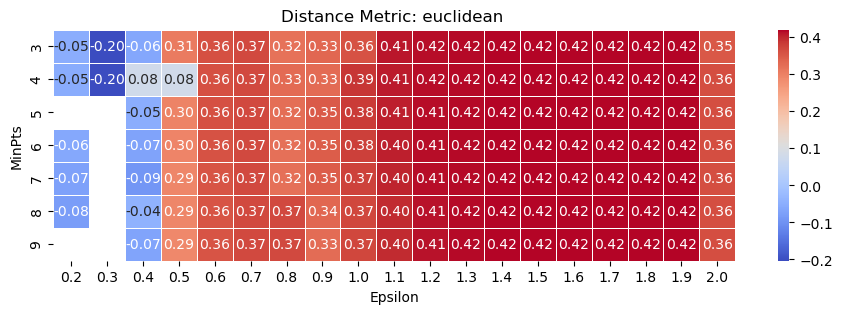

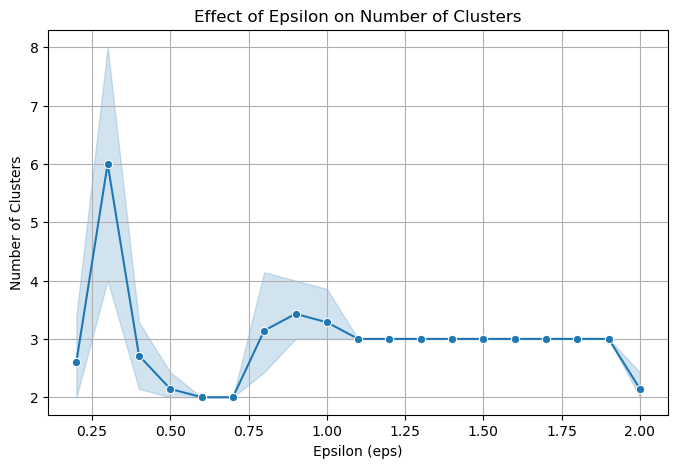

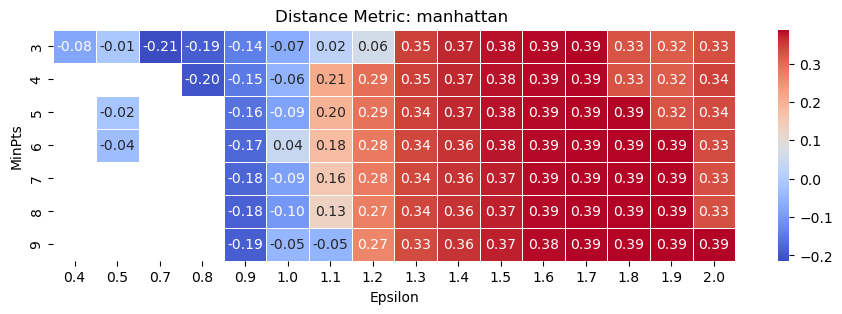

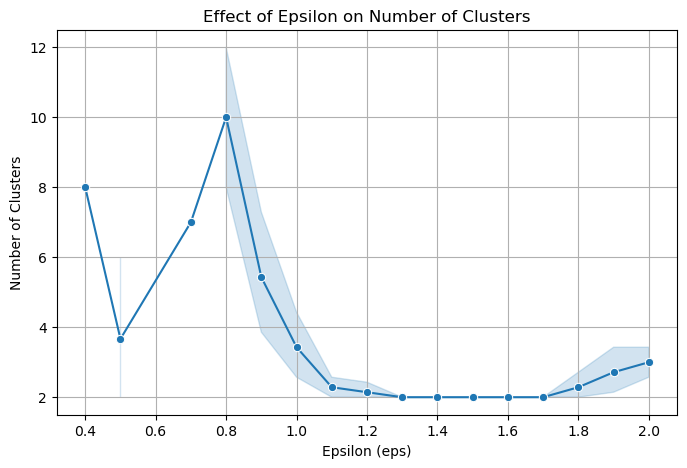

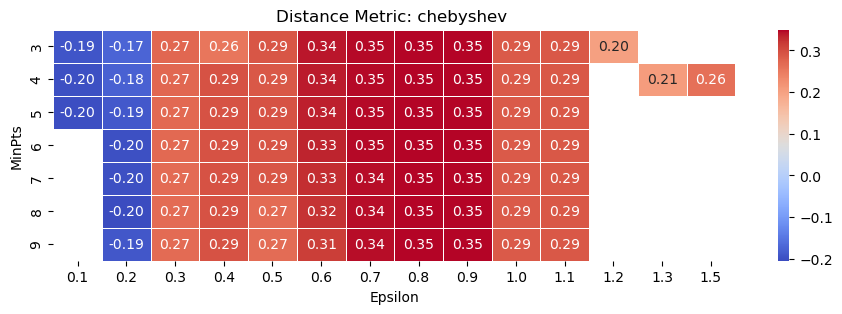

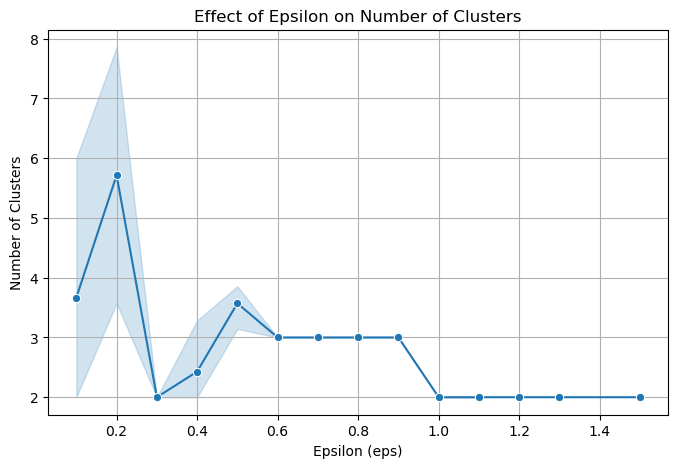

results for data set 2


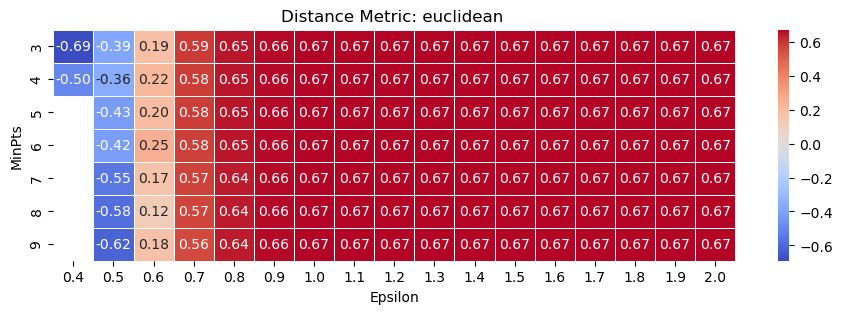

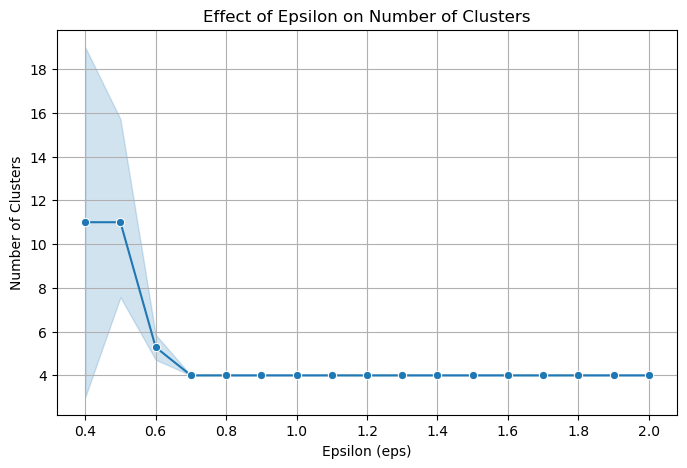

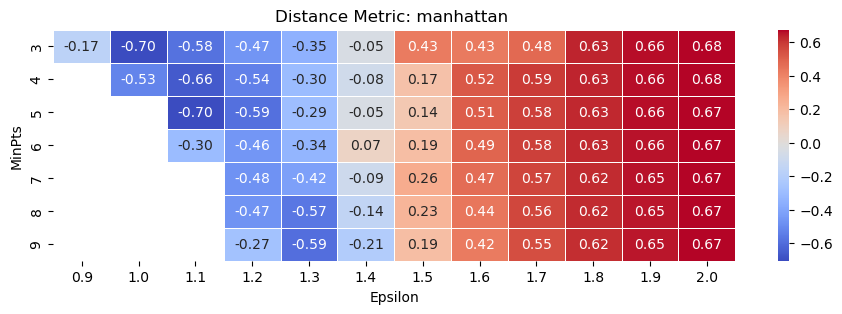

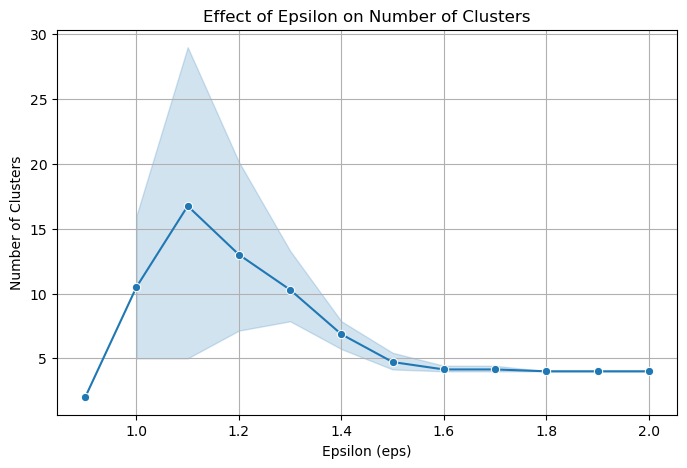

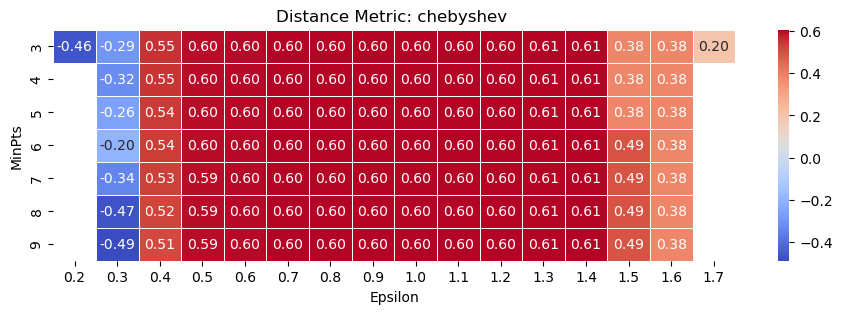

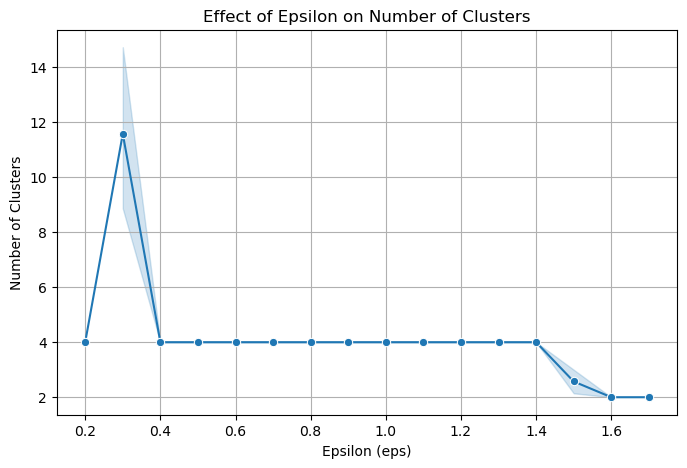

In [775]:
results_ = [res1, res2]
for i in range(2):
    results = results_[i]["results"]
    print(f"results for data set {i+1}")
    for dist_name, result in results.items():
            results_df = pd.DataFrame(result)
            pivot_table = results_df.pivot_table(
                values='score',
                index='min_pts',
                columns='eps_values'
            )
            
            plt.figure(figsize=(11, 3))
            sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
            plt.title(f'Distance Metric: {dist_name} ')
            plt.xlabel('Epsilon')
            plt.ylabel('MinPts')
            plt.show()

            plt.figure(figsize=(8, 5))
            sns.lineplot(x=results_df['eps_values'], y=results_df['n_clusters'], marker="o", linestyle="-")
            
            plt.xlabel("Epsilon (eps)")
            plt.ylabel("Number of Clusters")
            plt.title("Effect of Epsilon on Number of Clusters")
            plt.grid(True)
            plt.show()


        

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">3️⃣ <b>Metrics analysis</b></div>
<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 15px;">As you can see below 3 clusters for dataset1 and 4 clusters for dataset2
</br>
We use 2 Evaluation metrics - <b>Silhouette</b>, <b>Davies-Bouldin Index</b> and <b>Calinski–Harabasz index</b>
</div>

In [777]:
data = {
    "Dataset1": [
        res1['best_params'][0],  # eps
        res1['best_params'][1],  # min_samples
        res1['best_params'][2],  # metric
        res1['best_params'][3],  # n_clusters
        res1['best_params'][4],  # noise_points
        res1['silhouette'],      # silhouette score
        res1['db_index'],        # davies-bouldin index
        res1['calinski']         # calinski–harabasz index
    ],
    "Dataset2": [
        res2['best_params'][0],
        res2['best_params'][1],
        res2['best_params'][2],
        res2['best_params'][3],
        res2['best_params'][4],
        res2['silhouette'],
        res2['db_index'],
        res2['calinski'] 
    ]
}

# Create DataFrame
df = pd.DataFrame(data, index=['Epsilon', 'Min samples', 'Distance metric', 'Number of clusters',
                               'Noise points', 'Silhouette score', 'Davies-Bouldin Index score', 'Calinski–Harabasz index'])

# Display DataFrame
display(df)


,Dataset1,Dataset2
Epsilon,1.8,2.0
Min samples,3,3
Distance metric,euclidean,manhattan
Number of clusters,3,4
Noise points,296,63
Silhouette score,0.420628,0.675373
Davies-Bouldin Index score,3.074521,1.651155
Calinski–Harabasz index,113.294404,1349.98979


<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">4️⃣ <b>Visualizations</b></div>

<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 15px;">
We used two dimensionality reduction methods, <b>PCA</b> and <b>t-SNE</b> 2D and 3D, both for comparison and to get a better feel for the clustering.
</div>

<div style="color: #D35400; font-size: 15px;"> 📊 Plot clustering results function</div>

In [780]:
# Plot clustering results with different dimensionality reduction methods
def plot_clusters(data, labels, title, method="PCA"):
    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "t-SNE":
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
    
    reduced_data = reducer.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"{title} - {method}")
    plt.show()

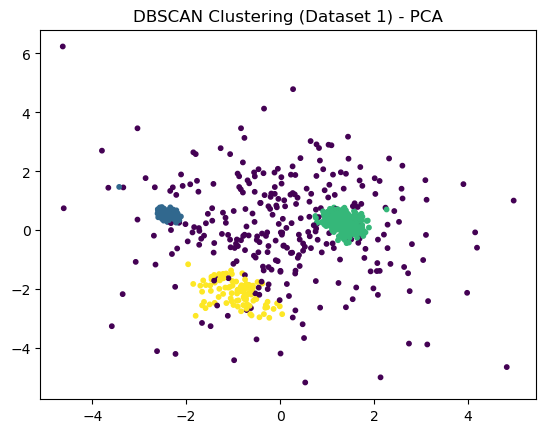

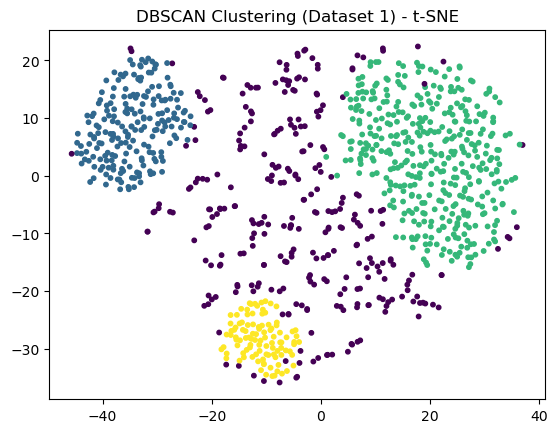

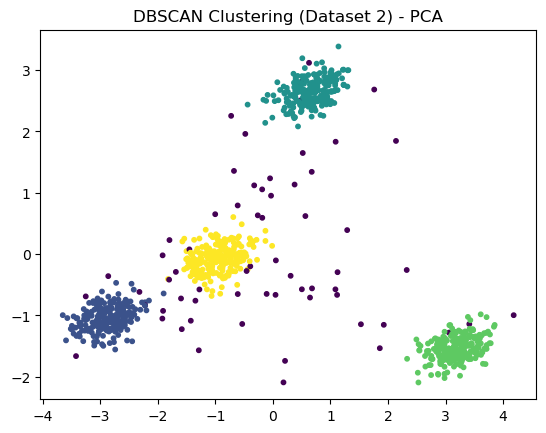

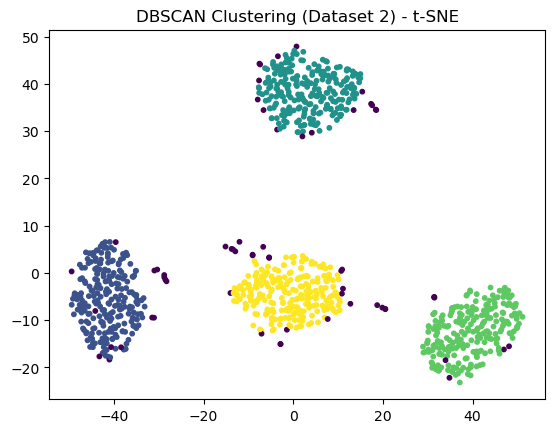

In [785]:
results_ = [res1, res2]
for i in range(2):
    res = results_[i]
    for method in ["PCA", "t-SNE"]:
        plot_clusters(res['data_scaled'], res['best_labels'], f"DBSCAN Clustering (Dataset {i+1})", method)

In [786]:
def plot_clusters_3d(data, labels, title, method="PCA"):
    if method == "PCA":
        reducer = PCA(n_components=3)
    elif method == "t-SNE":
        reducer = TSNE(n_components=3, perplexity=30, random_state=42)
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 't-SNE'")

    # Reduce to 3D
    reduced_data = reducer.fit_transform(data)

    # 3D Scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                         c=labels, cmap='viridis', s=10)

    # Labels and title
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    ax.set_title(f"{title} - {method}")

    # Color bar
    plt.colorbar(scatter)
    plt.show()


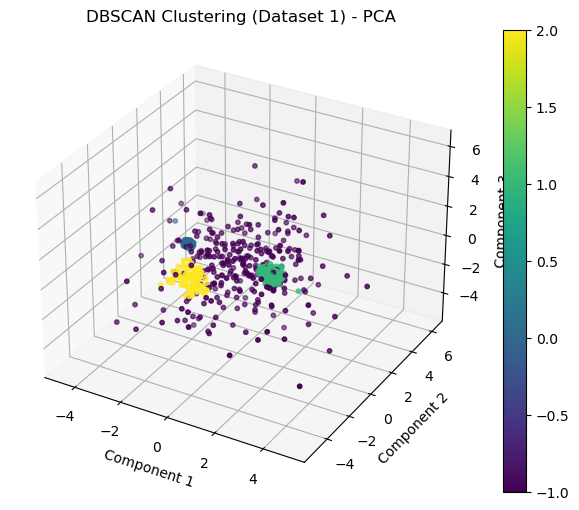

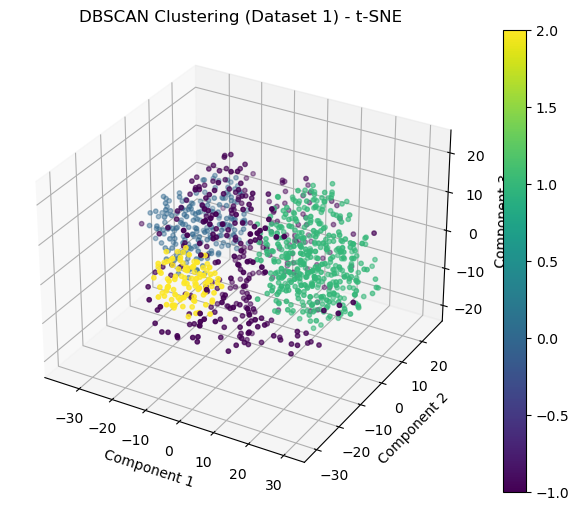

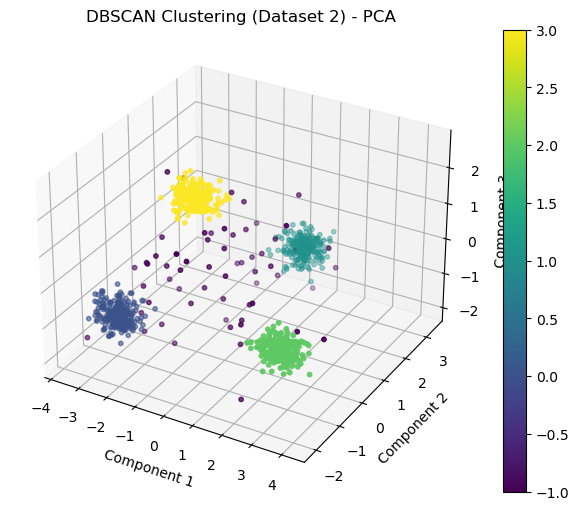

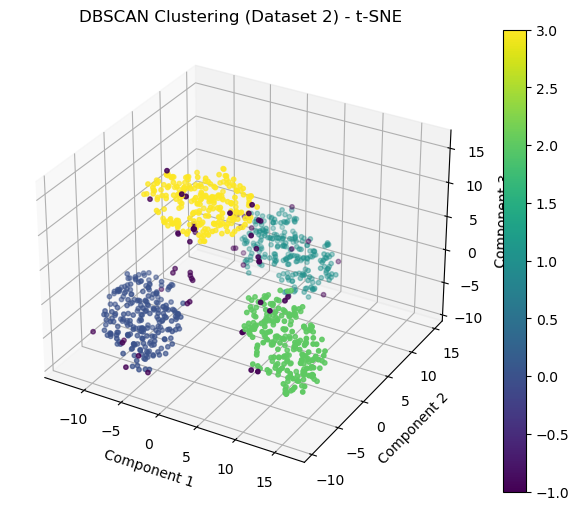

In [787]:
results_ = [res1, res2]
for i in range(2):
    res = results_[i]
    plot_clusters_3d(res['data_scaled'], res['best_labels'], f"DBSCAN Clustering (Dataset {i+1})", method="PCA")
    plot_clusters_3d(res['data_scaled'], res['best_labels'], f"DBSCAN Clustering (Dataset {i+1})", method="t-SNE")

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">5️⃣ <b>Conclusions</b></div>

<div style="font-family: Times; font-size: 18px; background-color: #EAF2F8; padding: 15px;">
According to the visualizations, it can be seen that there is a match between the two dimensionality reduction methods. In addition, for Data Set 2, a better clustering can be seen than in Data Set 1. This can also be seen for the evaluation results. In Data Set 2, the score based on Silhouette is larger, the score based on Davies-Bouldin Index is smaller and the score based on Calinski–Harabasz index is bigger - which means that the distribution of Data Set 2 is better.
</div>

<div style="text-align: center; font-size: 25px; font-weight: bold; color: #2E86C1;">END OF PART B</div>
<div style="text-align: center; font-size: 20px; color: #555;">THANKS!!!</div>